# Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [25]:
full_table = pd.read_csv("hotel_booking.csv")

# Data Understanding & Cleaning

In [26]:
full_table.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [27]:
full_table.shape

(119390, 36)

In [28]:
full_table.info(verbose=True, show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
full_table['reservation_status_date'] = pd.to_datetime(full_table['reservation_status_date'])


In [30]:
# Object datatypes columns usually house categorical data. To get details on the same 
full_table.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,422-804-6403,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [31]:
for col in full_table.describe(include = 'object').columns:
    print(col)
    print(full_table[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [32]:
full_table.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [33]:
full_table.drop(['company', 'agent'], axis = 1, inplace = True)
full_table.dropna(inplace = True)
full_table.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [34]:
full_table.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [35]:
# Of all the outliers only the Average Daily Rate is relevant to our analysis hence we handle the outlier in that column
full_table = full_table[full_table['adr']<5000]
full_table.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis & Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

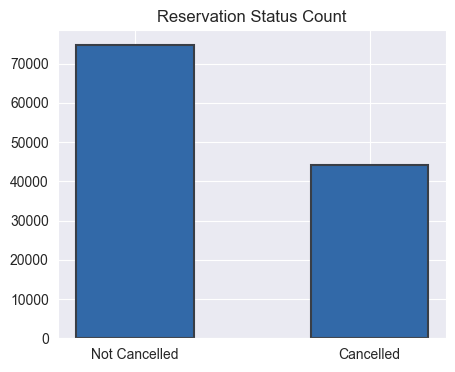

In [36]:
# Getting percentage of cancelled and non co
cancelled_percentage = full_table['is_canceled'].value_counts(normalize = True)
print(cancelled_percentage) # Based on our dataset 0 = False and 1 = True

# Setup plot
plt.figure(figsize = (5,4))
plt.bar(['Not Cancelled', 'Cancelled'], full_table['is_canceled'].value_counts(), color = prim, edgecolor = edge, linewidth = 1.5, width = 0.5)

# Enhance the plot
plt.title('Reservation Status Count')

# Display the plot
plt.show

In [37]:
# Analyse and compare the cancellation for each hotel
full_grouped = full_table.groupby(['hotel'])['is_canceled']
full_grouped.value_counts(normalize = True)

hotel         is_canceled
City Hotel    0              0.582918
              1              0.417082
Resort Hotel  0              0.720250
              1              0.279750
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

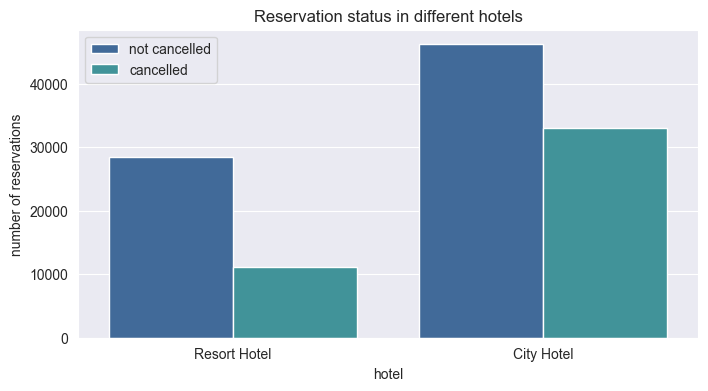

In [38]:
+'# Analyse and compare the cancellation for each hotel
# Setup plot
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = full_table, palette = [prim, sec])

# Enhance the plot
plt.legend(loc = 'upper left', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status in different hotels')
plt.xlabel('hotel')
plt.ylabel('number of reservations')

# Display the plot
plt.show

In [39]:
# Analyse impact of price on cancellation rates
resort_hotel = full_table[full_table['hotel'] == 'Resort Hotel'].groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [40]:
city_hotel = full_table[full_table['hotel'] == 'City Hotel'].groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


<function matplotlib.pyplot.show(close=None, block=None)>

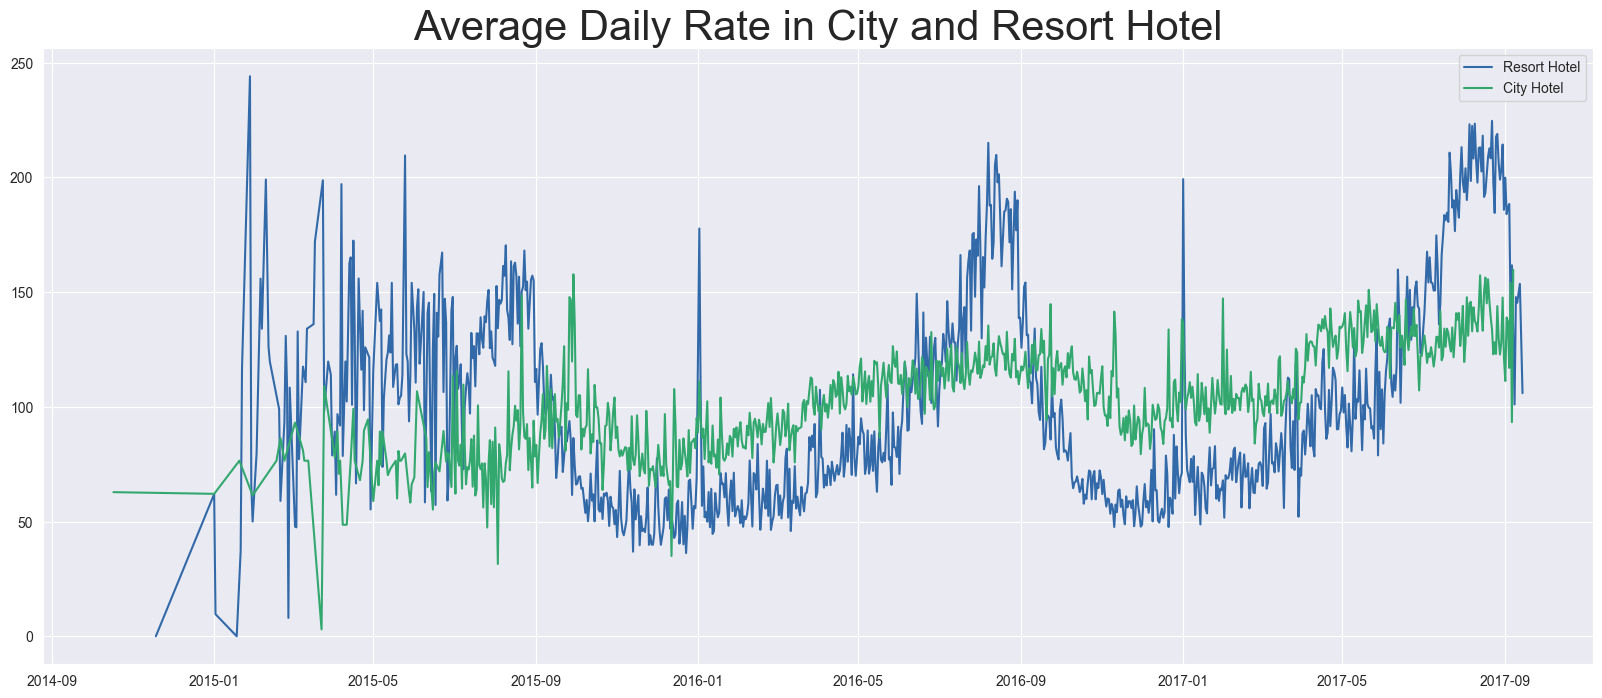

In [41]:
# Visualize prices of average daily rates for both hotels
# Set up the plot
plt.figure(figsize = (20,8))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel', color=prim)
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel', color=ter)

# Enhance the plot
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.legend(loc = 'best', labels=['Resort Hotel', 'City Hotel'])

# Display the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

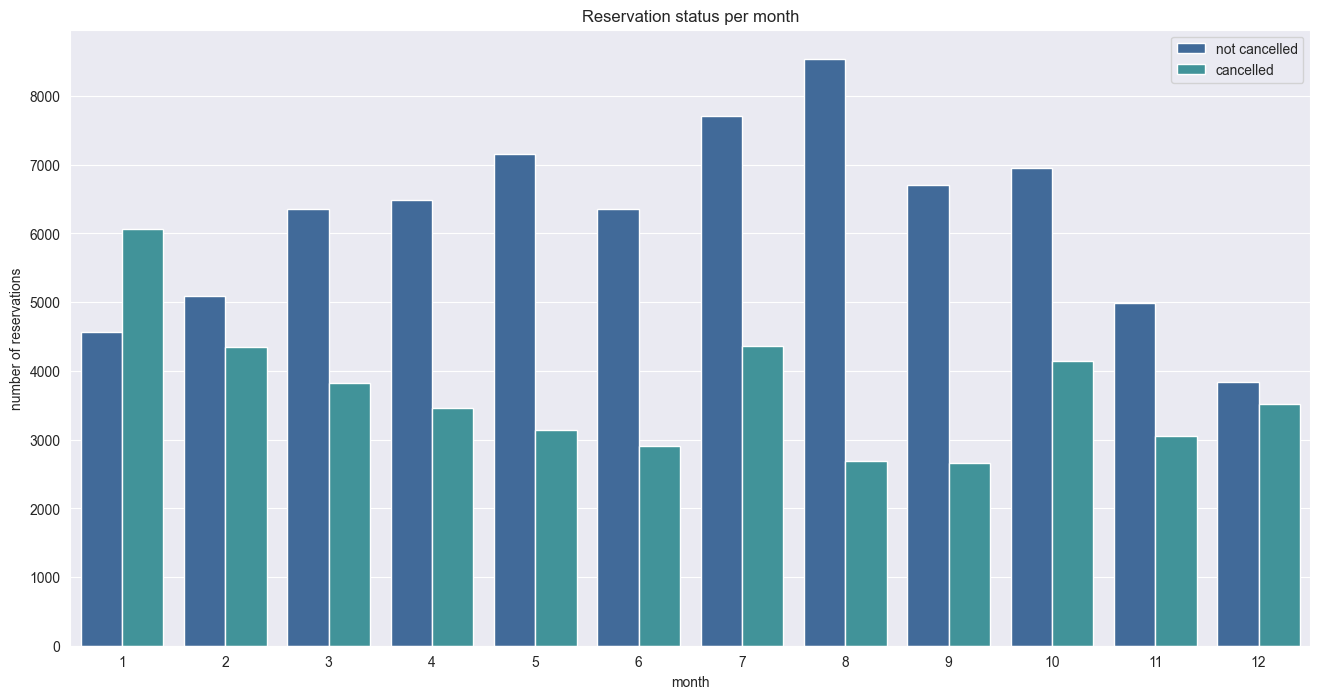

In [42]:
full_table['reservation_status_month'] = full_table['reservation_status_date'].dt.month

# Set up the plot
plt.figure(figsize = (16, 8))
ax1 = sns.countplot(x = 'reservation_status_month', hue = 'is_canceled', data = full_table, palette = [prim, sec])

# Enhance the plot
plt.legend(loc = 'best', labels=['not cancelled', 'cancelled'])
plt.title('Reservation status per month')
plt.xlabel('month')
plt.ylabel('number of reservations')

# Display the plot
plt.show

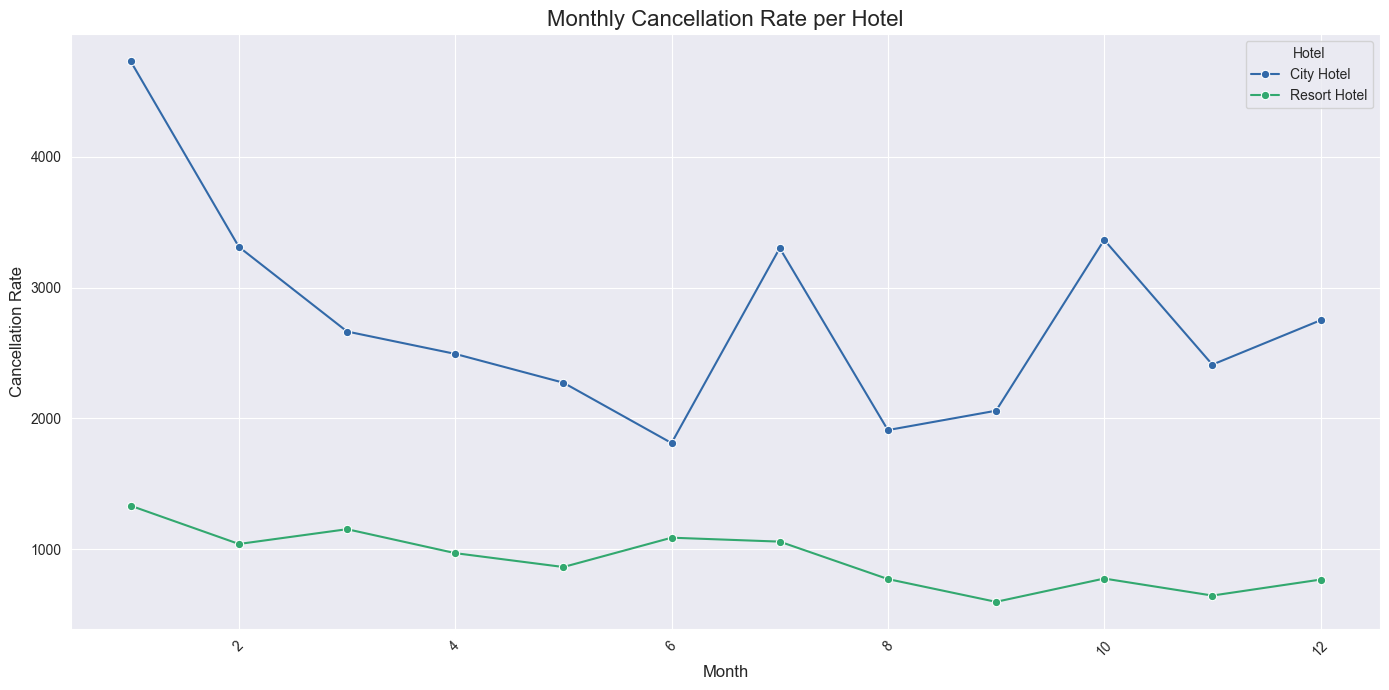

In [43]:
monthly_cancellations = full_table.groupby(['hotel', 'reservation_status_month'])['is_canceled'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='reservation_status_month', y='is_canceled', hue='hotel', data=monthly_cancellations, marker='o', palette = [prim, ter])

# Enhance the plot
plt.title('Monthly Cancellation Rate per Hotel', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.legend(title='Hotel')

# Display the plot
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

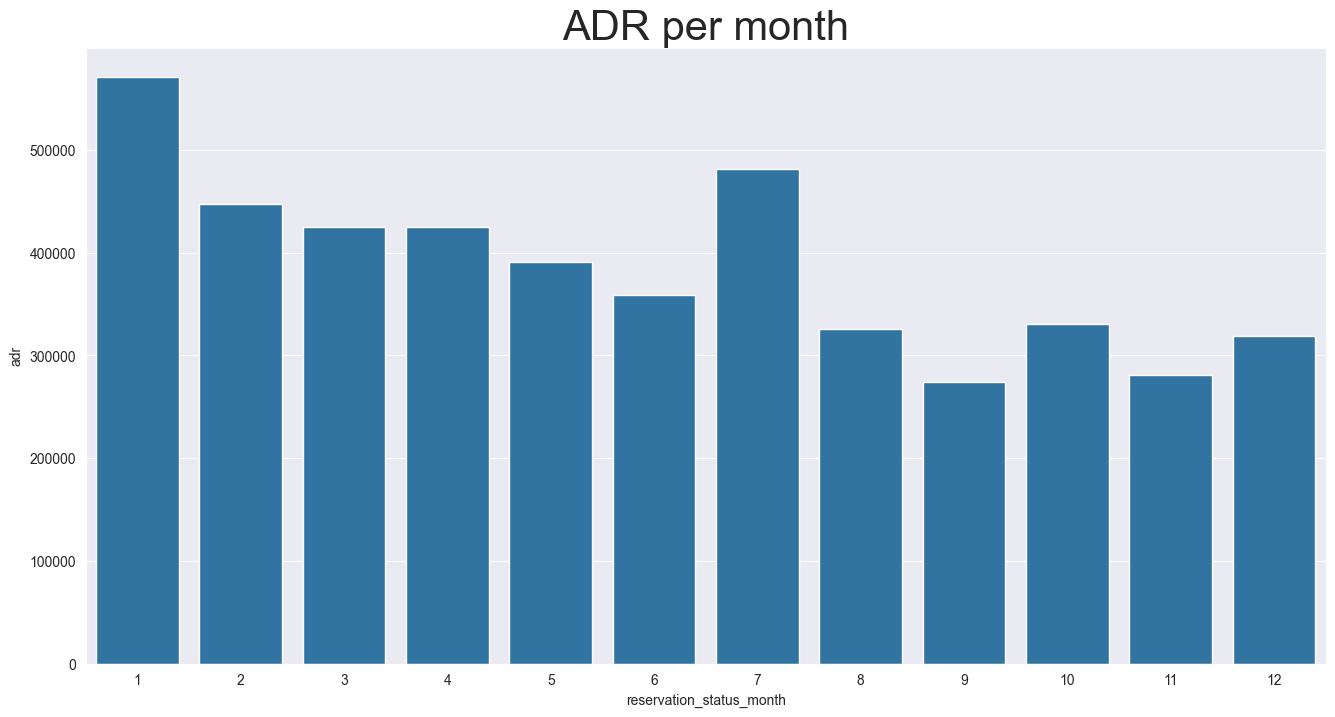

In [44]:
monthly_adr = full_table[full_table['is_canceled'] == 1].groupby('reservation_status_month')[['adr']].sum().reset_index()
# dark_blue_palette = sns.dark_palette("cyan", reverse=True, n_colors=len(monthly_adr))
# Setup plot
plt.figure(figsize = (16, 8))
sns.barplot(x='reservation_status_month', y='adr', data = monthly_adr) # palette = dark_blue_palette

# Enhance the plot
plt.title('ADR per month', fontsize = 30)

# Display the plot
plt.show

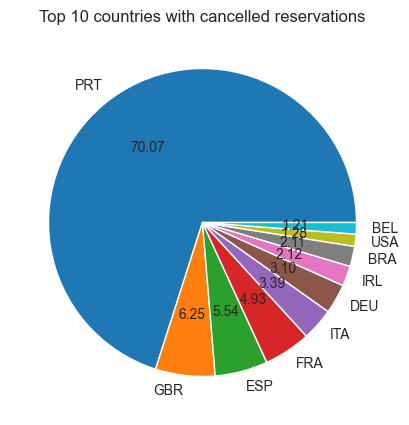

In [45]:
cancelled_data = full_table[full_table['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

# Setup plot
plt.figure(figsize = (5,5))
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)

# Enhance the plot 
plt.title('Top 10 countries with cancelled reservations')

# Show the plot
plt.show()